<p><font size = 5, color ="maroon"><strong>Read & Import packages.</strong></font></p>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

<html><p><font size = 5, color = 'maroon'>Master Dataset contains total of 7,83,667 records.</font></p></html> 
<html><p><font size = 3, color = 'maroon'>We divided the data in the ratio of 70-30%</font></p></html>

In [167]:
df_train = pd.read_csv('Downloads/train.csv')
df_test = pd.read_csv('Downloads/test.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [168]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


<html><p><font size = 5, color = 'maroon'>**Data Analysis</font></p></html>

In [169]:
df_train.isnull().sum().sort_values(ascending=False) * 100 / len(df_train)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [170]:
df_test.isnull().sum().sort_values(ascending=False) * 100 / len(df_test)

Product_Category_3            69.590195
Product_Category_2            30.969311
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [171]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


##### We will impute the missing values of Product Category 2 with mean value as Mean and Median of feature is close to 9.

In [172]:
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mean())

In [173]:
df_test['Product_Category_2'] = df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [174]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [175]:
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [176]:
df_train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [177]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

<html><p><font size = 5, color = 'maroon'>**Data Cleaning.</font></p></html> 

In [178]:
train_df = df_train.copy()
train_df.Stay_In_Current_City_Years.replace({'0':0,
                                         '1':1,
                                         '2':2,
                                         '3':3,
                                         '4+':4},inplace=True)
train_df.Age.replace({"55+":"55 & above"},inplace=True)
train_df.Gender.replace({'M':1,'F':0},inplace=True)
train_df.City_Category.replace({'A':1,'B':2,'C':3},inplace=True)

In [179]:
train_df = train_df.rename(columns={'Age':'Age_Groups'})
train_df.head()

,User_ID,Product_ID,Gender,Age_Groups,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,1,2,0,3,9.842329,NaN,8370
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.000000,14.0,15200
2,1000001,P00087842,0,0-17,10,1,2,0,12,9.842329,NaN,1422
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.000000,NaN,1057
4,1000002,P00285442,1,55 & above,16,3,4,0,8,9.842329,NaN,7969


In [180]:
test_df = df_test.copy()
test_df.Stay_In_Current_City_Years.replace({'0':0,
                                         '1':1,
                                         '2':2,
                                         '3':3,
                                         '4+':4},inplace=True)
test_df.Age.replace({"55+":"55 & above"},inplace=True)
test_df.Gender.replace({'M':1,'F':0},inplace=True)
test_df.City_Category.replace({'A':1,'B':2,'C':3},inplace=True)

In [181]:
test_df = test_df.rename(columns={'Age':'Age_Groups'})
test_df.head(1)

,User_ID,Product_ID,Gender,Age_Groups,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,46-50,7,2,2,1,1,11.0,NaN


<html><p><font size = 5, color = 'maroon'>**Exploratory Data Analysis.</font></p></html> 


In [182]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.0,15200


<html><p><font size = 4, color = 'maroon'>Univariate Analysis.</font></p></html> 


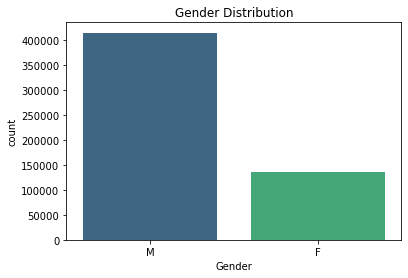

In [183]:
plt.title("Gender Distribution")
sns.countplot(df_train['Gender'], palette='viridis',order = df_train['Gender'].value_counts().index)
plt.show()

#### Insights:
1. The Gender feature has high data imbalance. The ratio of count of female customers is very less compared to male customers.
2. Need to handle this class imbalance using SMOTE/Oversampling techniques.

 

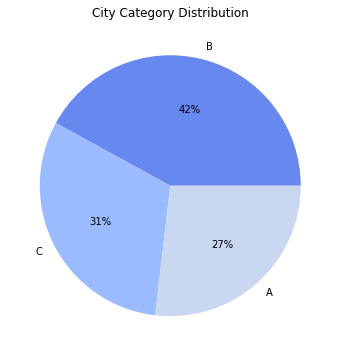

In [184]:
plt.figure(figsize = (10,6))
plt.title("City Category Distribution")
palette_color = sns.color_palette('coolwarm')
  
# plotting data on chart
plt.pie(df_train['City_Category'].value_counts(normalize=True), colors=palette_color, autopct='%.0f%%', labels = list(df_train['City_Category'].value_counts().index))
  
# displaying chart
plt.show()

#### Insight:
 1. City category B has observed to be having highest percentage of customers who have purchased in Black Friday Sale i.e 42% compared to A and C.

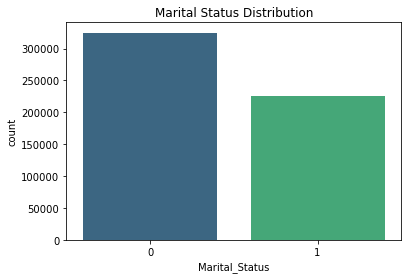

In [185]:
plt.title("Marital Status Distribution")
sns.countplot(df_train['Marital_Status'], palette='viridis')
plt.show()

#### Insight:
 1. Data shows unmarried customers have spent on Black Friday sale more than married customers.

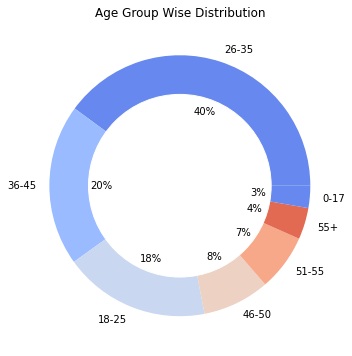

In [186]:
plt.figure(figsize = (10,6))
plt.title("Age Group Wise Distribution")

my_circle = plt.Circle((0, 0), 0.7, color='white')
palette_color = sns.color_palette('coolwarm')
  
# plotting data on chart
plt.pie(df_train['Age'].value_counts(normalize=True), colors=palette_color, autopct='%.0f%%', labels = list(df_train['Age'].value_counts().index))
  
p = plt.gcf()
p.gca().add_artist(my_circle)

# displaying chart
plt.show()

#### Insights:
 1. Age group 26-35 years has highest percentage of customers who have spent on Black Friday sale i.e almost around 40%.
 2. Age group 0-17 years has lowest percentage of customers who have spent (3%). And it is reasonable as teenage customers are less probable to have income.
 3. Age group 18-25 & 36-45 years has average percentage of customers who spent on sale (around 20%).
 4. Customers with Age above 45 years has observed to have decreasing percentage of customers as trend.

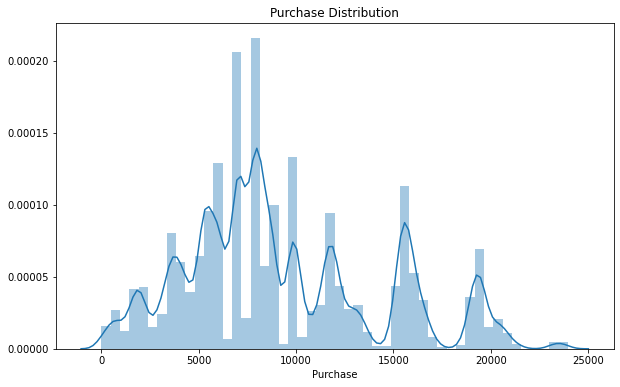

In [187]:
plt.figure(figsize = (10,6))
plt.title("Purchase Distribution")
sns.distplot(df_train['Purchase'])

#### Insights:
 1. The important observation form the above visualisation can be made that there are some outliers present in the dependent/target feature "Purchase".
 2. According to distplot data is nearly normally distributed.

<html><p><font size = 4, color = 'maroon'>Bivariate Analysis.</font></p></html> 


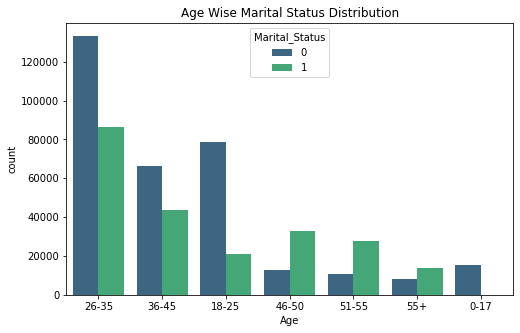

In [188]:
plt.figure(figsize = (8,5))
plt.title("Age Wise Marital Status Distribution")
sns.countplot(df_train['Age'], hue=df_train['Marital_Status'], palette='viridis', order = df_train['Age'].value_counts().index)
plt.show()

#### Insights:
 1. Age group 0-17 years has all the single customers.
 2. Age group 18-25 & 36-45 years has high single ratio than married.
 3. Age group 26-35 years has highest ratio of both being single and married customers.
 4. As age group is getting increased the ratio of being single is reduced. For example, 46-50, 51-55 & 55+, etc.

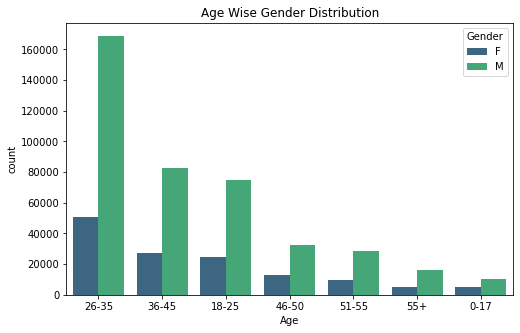

In [189]:
plt.figure(figsize = (8,5))
plt.title("Age Wise Gender Distribution")
sns.countplot(df_train['Age'], hue=df_train['Gender'], palette='viridis', order = df_train['Age'].value_counts().index)
plt.show()

#### Insights:
 1. In each Age group Male customers are dominating in spending/purchase in Black Friday Sale.
 2. Age group 26-35 years has highest number of customers, whereas group 18-25 & 36-45 years has average number of customers.
 3. Age groups 0-17 & 55+ years has lowest number of customers.
 4. Less number of customers are witnessed in age groups 46-50 & 51-55 years to purchase in Sale.

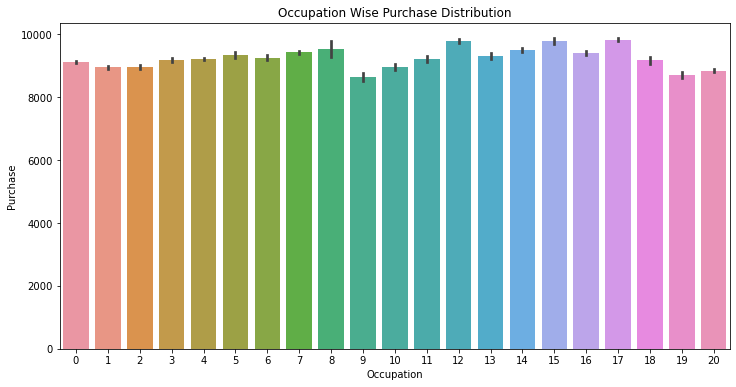

In [190]:
plt.figure(figsize = (12,6))
plt.title("Occupation Wise Purchase Distribution")
sns.barplot(x='Occupation', y='Purchase', data=df_train)

#### Insight:
 1. Almost all of the Occupation categories have spent 8000-10000 in Black Friday sale

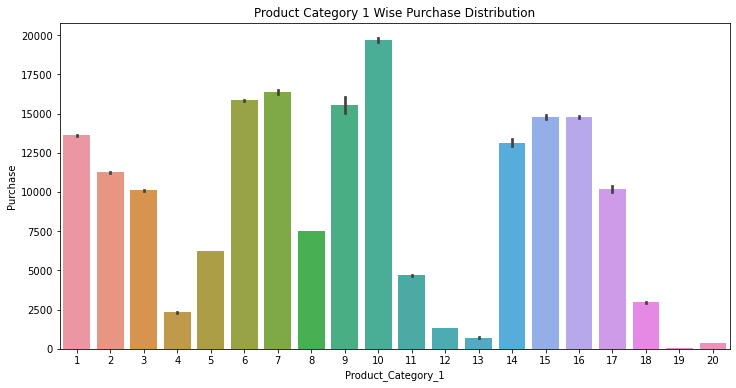

In [191]:
plt.figure(figsize = (12,6))
plt.title("Product Category 1 Wise Purchase Distribution")
sns.barplot(x='Product_Category_1', y='Purchase', data=df_train)

#### Insights:
 1. Product category 10 has highest Purchase happened in Black Friday Sale.
 2. Other Categories has a dispersed sales.

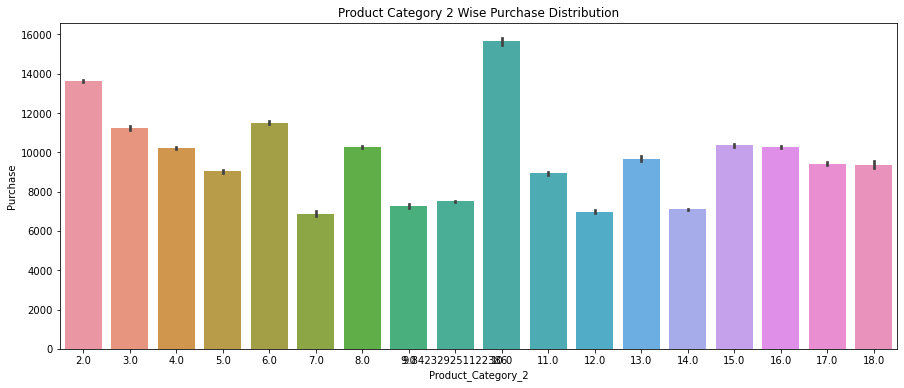

In [192]:
plt.figure(figsize = (15,6))
plt.title("Product Category 2 Wise Purchase Distribution")
sns.barplot(x='Product_Category_2', y='Purchase', data=df_train)

#### Insights:
1. Product category 10 has highest Purchase happened in Black Friday Sale.
2. Other Categories has a dispersed sales.
3. We can't make any solid statement from above visualizations.

<html><p><font size = 4, color = 'maroon'>Multivariate Analysis.</font></p></html> 


In [193]:
pd.crosstab([df_train['Gender']], [df_train['Marital_Status'], df_train['Age']], normalize=True)*100

Marital_Status         0                                                      \
Age                 0-17      18-25      26-35     36-45     46-50     51-55   
Gender                                                                         
F               0.924068   3.337224   5.468051  3.026717  0.575565  0.650829   
M               1.821411  10.941738  18.764589  9.040337  1.731422  1.319655   

Marital_Status                   1                                           \
Age                  55+     18-25      26-35     36-45     46-50     51-55   
Gender                                                                        
F               0.346866  1.140041   3.758444  1.912673  1.823956  1.147858   
M               1.086229  2.698757  11.928889  6.020165  4.177302  3.880975   

Marital_Status            
Age                  55+  
Gender                    
F               0.577201  
M               1.899038

#### Insights:
 1. In all unmarried customers, Age groups 18-25 & 26-35 years has highest percentage of customers in both genders Male & Female.
 2. In all Male married customers, Age groups 18-25 & 26-35 years has highest percentage of customers.
 3. In all Female married customers, Age groups 26-35 & 36-45 years has highest purchase customers.

In [194]:
pd.crosstab([df_train['City_Category'],df_train['Marital_Status']], [df_train['Gender'], df_train['Age']], normalize=True)*100

Gender                               F                                \
Age                               0-17     18-25     26-35     36-45   
City_Category Marital_Status                                           
A             0               0.263058  0.861348  1.816866  0.853894   
              1               0.000000  0.278329  1.362922  0.437764   
B             0               0.284510  1.557989  2.550594  1.209305   
              1               0.000000  0.566475  1.346561  0.810445   
C             0               0.376499  0.917887  1.100591  0.963517   
              1               0.000000  0.295236  1.048961  0.664463   

Gender                                                             M  \
Age                              46-50     51-55       55+      0-17   
City_Category Marital_Status                                           
A             0               0.048358  0.085989  0.038541  0.199430   
              1               0.178887  0.237243  0.027633  0.000000   
B             0               0.269421  0.327778  0.077263  0.703549   
              1               0.894798  0.443582  0.168343  0.000000   
C             0               0.257786  0.237062  0.231062  0.918432   
              1               0.750271  0.467033  0.381226  0.000000   

Gender                                                                \
Age                              18-25     26-35     36-45     46-50   
City_Category Marital_Status                                           
A             0               3.100526  6.613728  1.822684  0.394497   
              1               0.765542  3.613008  1.724514  0.761179   
B             0               4.561800  7.664689  4.268200  0.612833   
              1               1.175855  5.087735  2.365162  1.932670   
C             0               3.279413  4.486173  2.949454  0.724092   
              1               0.757361  3.228146  1.930489  1.483453   

Gender                                            
Age                              51-55       55+  
City_Category Marital_Status                      
A             0               0.237243  0.238698  
              1               0.548296  0.344685  
B             0               0.539751  0.227608  
              1               1.914127  0.465215  
C             0               0.542660  0.619923  
              1               1.418552  1.089138

#### Insights:
 1. City B has highest percentage of Female customers in Age group 26-35 years in both Married and Unmarried marital status.
 2. City B has highest percentage of Male customers in Age group 26-35 years in both Married and Unmarried marital status.
 3. <b>The above tabular representation shows that, in all the city categories A, B & C, the customers who have purchased/spent on Black Friday Sale always have high percentage of Unmarried customers irrespective of their Gender, Age groups.</b>
 4. <b>Hence, we can say that Unmarried customers are more tend to spend in Black Friday sale.</b>

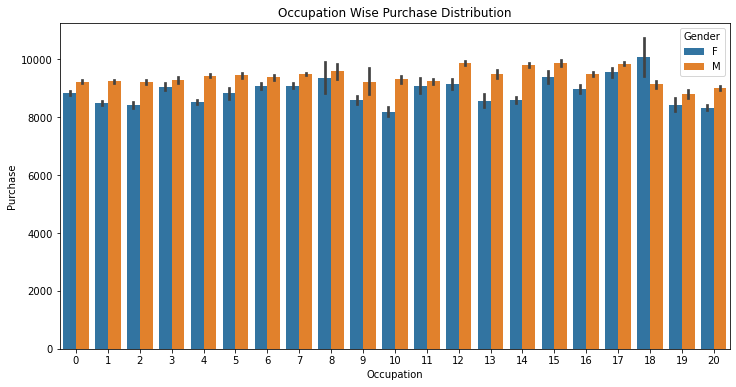

In [195]:
plt.figure(figsize = (12,6))
plt.title("Occupation Wise Purchase Distribution")
sns.barplot(x='Occupation', y='Purchase', hue = 'Gender',data=df_train)

#### Insights:
 1. In the Occupation level 18, Female customers has high purchase amount compared to Male customers.
 2. The purchase amount of all the Occupation levels is almost in the range of 8000-10000, <b><em>which indicates Occupation levels has no greater impact on the purchase in Black Friday.</em></b>.

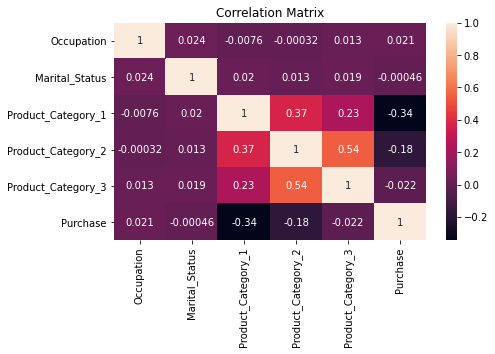

In [196]:
plt.figure(figsize = (7,4))
plt.title("Correlation Matrix")
feats = ['Gender', 'City_Category', 'Occupation','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
sns.heatmap(df_train[feats].corr(), annot = True)

#### Insights:
 1. Occupation levels has no impact/correlation on independent as well as dependent features.<b><em>Occupation feature can be dropped based on the various performance comparisons of the Model.</em></b>
 2. Product Category 3 has no correlation with target feature (Purchase).<b><em>Also it has 70% of missing values, Hence, Product Category 3 feature can be dropped</em></b>
 3. Product Category 1 & Product Category 2 has strong negative correlation with target feature(Purchase). Which means the change of value in one feature varies with change of value in other feature. This is called as Inverse correlation. In other words, If the value of Purchase Category 1 increases, that will result in reduction in Purchase Value.

<html><p><font size = 5, color = 'maroon'>**Feature Engineering & Extraction</font></p></html> 
<html><p><font size = 3, color = 'maroon'>Transforming categorical feature into numeric using dummy encoding technique(One hot encoding).</font></p></html> 



In [197]:
one_hot=pd.get_dummies(data=train_df['Age_Groups'],prefix='Age_Group',drop_first=True)
one_hot

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
550063,0,0,0,0,1,0
550064,0,1,0,0,0,0
550065,0,1,0,0,0,0
550066,0,0,0,0,0,1


In [198]:
train_df = pd.concat([train_df,one_hot],axis = 1).drop('Age_Groups',axis = 1)
train_df

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,1000001,P00069042,0,10,1,2,0,3,9.842329,NaN,8370,0,0,0,0,0,0
1,1000001,P00248942,0,10,1,2,0,1,6.000000,14.0,15200,0,0,0,0,0,0
2,1000001,P00087842,0,10,1,2,0,12,9.842329,NaN,1422,0,0,0,0,0,0
3,1000001,P00085442,0,10,1,2,0,12,14.000000,NaN,1057,0,0,0,0,0,0
4,1000002,P00285442,1,16,3,4,0,8,9.842329,NaN,7969,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,13,2,1,1,20,9.842329,NaN,368,0,0,0,0,1,0
550064,1006035,P00375436,0,1,3,3,0,20,9.842329,NaN,371,0,1,0,0,0,0
550065,1006036,P00375436,0,15,2,4,1,20,9.842329,NaN,137,0,1,0,0,0,0
550066,1006038,P00375436,0,1,3,2,0,20,9.842329,NaN,365,0,0,0,0,0,1


In [199]:
one_hot_test = pd.get_dummies(data=test_df['Age_Groups'],prefix='Age_Group',drop_first=True)
one_hot_test

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [200]:
test_df = pd.concat([test_df,one_hot_test],axis = 1).drop('Age_Groups',axis = 1)
test_df.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,1000004,P00128942,1,7,2,2,1,1,11.0,NaN,0,0,0,1,0,0
1,1000009,P00113442,1,17,3,0,0,3,5.0,NaN,0,1,0,0,0,0
2,1000010,P00288442,0,1,2,4,1,5,14.0,NaN,0,0,1,0,0,0
3,1000010,P00145342,0,1,2,4,1,4,9.0,NaN,0,0,1,0,0,0
4,1000011,P00053842,0,1,3,1,0,4,5.0,12.0,0,1,0,0,0,0


<html><p><font size = 5, color = 'maroon'>Drop unwanted features.</font></p></html> 
<html><p><font size = 3, color = 'maroon'> Dropping Product_Category_3 as it has 70% of the data missing..</font></p></html> 


In [201]:
train_df.drop(columns = ['User_ID','Product_ID','Product_Category_3', 'Occupation'],axis = 1,inplace=True)
train_df

,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,0,1,2,0,3,9.842329,8370,0,0,0,0,0,0
1,0,1,2,0,1,6.000000,15200,0,0,0,0,0,0
2,0,1,2,0,12,9.842329,1422,0,0,0,0,0,0
3,0,1,2,0,12,14.000000,1057,0,0,0,0,0,0
4,1,3,4,0,8,9.842329,7969,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,2,1,1,20,9.842329,368,0,0,0,0,1,0
550064,0,3,3,0,20,9.842329,371,0,1,0,0,0,0
550065,0,2,4,1,20,9.842329,137,0,1,0,0,0,0
550066,0,3,2,0,20,9.842329,365,0,0,0,0,0,1


In [202]:
test_df.drop(columns = ['User_ID','Product_ID','Product_Category_3', 'Occupation'],axis = 1,inplace=True)
test_df

,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,1,2,2,1,1,11.000000,0,0,0,1,0,0
1,1,3,0,0,3,5.000000,0,1,0,0,0,0
2,0,2,4,1,5,14.000000,0,0,1,0,0,0
3,0,2,4,1,4,9.000000,0,0,1,0,0,0
4,0,3,1,0,4,5.000000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,4,1,8,9.849586,0,1,0,0,0,0
233595,0,2,4,1,5,8.000000,0,1,0,0,0,0
233596,0,2,4,1,1,5.000000,0,1,0,0,0,0
233597,0,3,4,0,10,16.000000,0,0,0,1,0,0


<html><p><font size = 5, color = 'maroon'>**Outlier treatment on train dataset.</font></p></html> 


In [203]:
import scipy.stats as stats

train_df['zscore'] = stats.zscore(train_df['Purchase'])
print("The Minimum zscore of feature Purchase is:", np.round(train_df['zscore'].min()))
print("The Maximum zscore of feature Purchase is:", np.round(train_df['zscore'].max()))
train_df.drop('zscore',axis = 1, inplace = True)

The Minimum zscore of feature Purchase is: -2.0
The Maximum zscore of feature Purchase is: 3.0


As per Z_score method to detect and remove outliers, the threshold value of lambda(the decision parameter) should be +3 & -3. And as our mimimum and maximum z_score is below the threshold, we can say that there are no outliers.

<html><p><font size = 5, color = 'maroon'>**Separate Independent and dependent features & Split the data in train and test sets.</font></p></html> 


In [205]:
X = train_df.drop("Purchase",axis = True)
y = train_df["Purchase"]

x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=101)

<html><p><font size = 5, color = 'maroon'>**Modeling.</font></p></html> 


<html><p><font size = 3, color = 'maroon'>Linear Regression.</font></p></html> 


In [206]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_lr))
print('R2 Score:',metrics.r2_score(y_test,y_pred_lr)*100)

RMSE: 4694.569599682641
MAPE: 1.1134022216354589
R2 Score: 12.631382780679578


In [207]:
y_pred_train_lr = lr.predict(x_train)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train_lr))
print('R2 Score:',metrics.r2_score(y_train,y_pred_train_lr)*100)

RMSE: 4690.693640109924
MAPE: 1.1247366725912407
R2 Score: 12.800269305429568


<html><p><font size = 3, color = 'maroon'>Random Forest Regressor.</font></p></html> 


In [208]:
rfr=RandomForestRegressor(random_state=0)
rfr.fit(x_train, y_train)

y_pred_rfr=rfr.predict(x_test)

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_rfr))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_rfr)*100,2))

RMSE: 3015.3225343046383
MAPE: 0.3408985831052717
R2 Score: 63.96


In [209]:
y_pred_train_rfr = rfr.predict(x_train)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rfr)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train_rfr))
print('R2 Score:',metrics.r2_score(y_train,y_pred_train_rfr)*100)

RMSE: 2853.0580891810814
MAPE: 0.32484695245946726
R2 Score: 67.74015817141503


<html><p><font size = 3, color = 'maroon'>XGBoost Regressor.</font></p></html> 


In [210]:
xgb_reg=XGBRegressor()
xgb_reg.fit(x_train,y_train)
y_pred_xgb = xgb_reg.predict(x_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_xgb))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_xgb)*100,2))

RMSE: 2972.3568267550327
MAPE: 0.3567527385887654
R2 Score: 64.98


In [211]:
y_pred_train_xgb = xgb_reg.predict(x_train)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_xgb)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train_xgb))
print('R2 Score:',metrics.r2_score(y_train,y_pred_train_xgb)*100)

RMSE: 2935.1009550901113
MAPE: 0.3530069512521715
R2 Score: 65.85814662280279


<html><p><font size = 5, color = 'maroon'>Performance Metrics Comparison:</font></p></html> 

<html><p><font size = 2, color = 'maroon'>
RMSE: 4694.56<br>
MAPE: 1.11<br>
R2 Score: 12.63<br><br></font></p></html> 

<html><p><font size = 2, color = 'maroon'>
RMSE: 3015.32<br>
MAPE: 0.34<br>
R2 Score: 63.96<br><br></font></p></html> 

<html><p><font size = 2, color = 'maroon'>
RMSE: 2972.35<br>
MAPE: 0.35<br>
R2 Score: 64.98<br><br></font></p></html> 

<html><p><em><font size = 4, color = 'maroon'>Clearly, XGBoost Regressor is performing well as we are getting lowest RSME, low MAPE and high R-squared errors as compared to other models.</font></em></p></html> 


<b><b> 


<b>

<html><p><font size = 5, color = 'maroon'>**Merge outputs with x_test and comapre Actual and Predicted Values.</font></p></html> 


In [212]:
output_df = df_train[df_train.index.isin(x_test.index)]
output_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,NaN,1422
12,1000005,P00031342,M,26-35,20,A,1,1,8,9.842329,NaN,6073


In [213]:
preds = pd.DataFrame(y_pred_xgb).rename(columns={0:'Predictions'}).set_index(x_test.index)
preds.head(2)

,Predictions
24033,8125.541016
301904,7806.015137


In [214]:
output_df= output_df.merge(preds, how = 'left' ,left_index=True, right_index=True)
output_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Predictions
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,NaN,1422,1348.173950
12,1000005,P00031342,M,26-35,20,A,1,1,8,9.842329,NaN,6073,7207.742676
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.000000,14.0,5378,6909.993164
22,1000008,P00213742,M,26-35,12,C,4+,1,8,9.842329,NaN,9743,7862.944824
23,1000008,P00214442,M,26-35,12,C,4+,1,8,9.842329,NaN,5982,7862.944824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550044,1006004,P00370853,F,26-35,15,C,2,0,19,9.842329,NaN,62,245.385040
550047,1006009,P00372445,F,26-35,12,C,3,0,20,9.842329,NaN,244,381.417999
550048,1006010,P00371644,M,36-45,0,C,1,0,20,9.842329,NaN,591,420.123199
550051,1006013,P00375436,F,26-35,20,C,3,0,20,9.842329,NaN,489,381.417999


<html><p><font size = 4, color = 'maroon'>Let's visualize the predicted results.</font></p></html> 


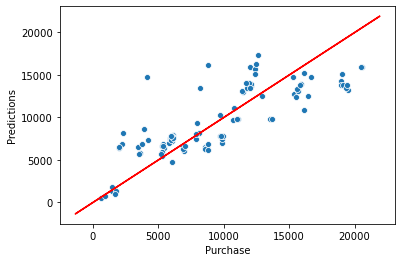

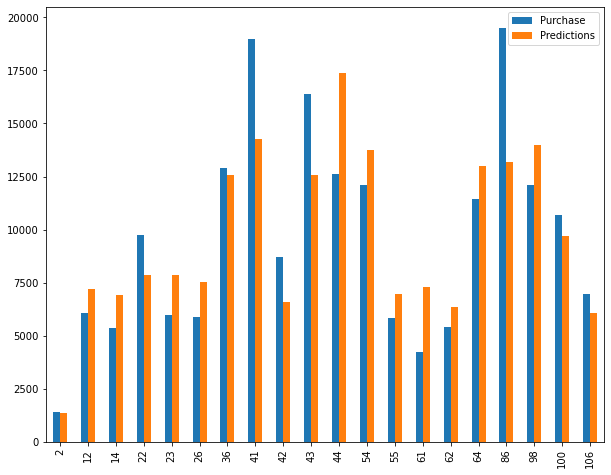

In [228]:
sns.scatterplot(data=output_df.head(100), x='Purchase',y='Predictions')
plt.plot(y_pred_xgb,y_pred_xgb,'r')
plt.show()
output_df[['Purchase','Predictions']].head(20).plot(kind='bar',figsize=(10,8))
plt.show()

The Blue bar represents Actual purchase value and Orange bar represents Predicted purchase value. We can see that most of the Actual and predicted valuesare close. And model is Performing well and not overfitting.

<html><p><font size = 5, color = 'maroon'>**Predict on Unseen data.</font></p></html> 


In [215]:
test_df.head(2)

,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above
0,1,2,2,1,1,11.0,0,0,0,1,0,0
1,1,3,0,0,3,5.0,0,1,0,0,0,0


In [217]:
pred_xgb = xgb_reg.predict(test_df)
test_preds = pd.DataFrame(pred_xgb).rename(columns={0:'Predicted Purchase'})
test_preds.head()

,Predicted Purchase
0,14242.577148
1,10929.032227
2,7042.043945
3,2967.486816
4,2478.158936


In [218]:
test_df.merge(test_preds, how = 'left', left_index = True, right_index = True)

,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-50,Age_Group_51-55,Age_Group_55 & above,Predicted Purchase
0,1,2,2,1,1,11.000000,0,0,0,1,0,0,14242.577148
1,1,3,0,0,3,5.000000,0,1,0,0,0,0,10929.032227
2,0,2,4,1,5,14.000000,0,0,1,0,0,0,7042.043945
3,0,2,4,1,4,9.000000,0,0,1,0,0,0,2967.486816
4,0,3,1,0,4,5.000000,0,1,0,0,0,0,2478.158936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,4,1,8,9.849586,0,1,0,0,0,0,7344.817871
233595,0,2,4,1,5,8.000000,0,1,0,0,0,0,6442.360352
233596,0,2,4,1,1,5.000000,0,1,0,0,0,0,12347.626953
233597,0,3,4,0,10,16.000000,0,0,0,1,0,0,19883.351562
